In [103]:
import pandas as pd
import numpy as np
from rake_nltk import Rake


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
pd.set_option('display.max_rows', 10)
df = pd.read_excel('dnd-dataframe.xlsx', sheet_name=0, usecols=['name','herotype','weapons','spells','background' ])
df.head(3)

,name,herotype,weapons,spells,background
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment","You were poor or feared becoming poor, so you ..."
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy,"You took up with a confidence artist, from who..."
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",You ran away from home to follow a minstrel tr...


In [107]:
#let's clean up the ugly data - note this toy data didnt need cleaning but the real dataset will
df = df.replace(r'\r',' ', regex=True) 
df = df.replace(r'\n',' ', regex=True) 
df.head(3)

,name,herotype,weapons,spells,background
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment","You were poor or feared becoming poor, so you ..."
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy,"You took up with a confidence artist, from who..."
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",You ran away from home to follow a minstrel tr...


In [108]:
df['background'] = df['background'].str.replace(r'[^\w\s]+', '')
df.head(3)

,name,herotype,weapons,spells,background
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment",You were poor or feared becoming poor so you l...
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy,You took up with a confidence artist from whom...
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",You ran away from home to follow a minstrel tr...


In [109]:
df2 = df.copy()


In [110]:

df.shape
df = df[['name','herotype','weapons','spells','background']]
df.head(3)

,name,herotype,weapons,spells,background
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment",You were poor or feared becoming poor so you l...
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy,You took up with a confidence artist from whom...
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",You ran away from home to follow a minstrel tr...


In [111]:
df['background'] = df['background'].astype(str)
df['spells'] = df['spells'].astype(str)
df['weapons'] = df['weapons'].astype(str)
df['herotype'] = df['herotype'].astype(str)

In [112]:
df.set_index('name', inplace = True)
df.head()

,herotype,weapons,spells,background
name,,,,
bam,Bard,"Dagger, sling, club","Transmutation, Enchantment",You were poor or feared becoming poor so you l...
niem,Sorcerer,"light crossbow, battleaxe",Necromancy,You took up with a confidence artist from whom...
aem,Paladin,Greataxe,"Abjuration, Conjuration",You ran away from home to follow a minstrel tr...
yaeks,Rogue,"club, battleaxe","Conjuration, Evocation, Transmutation",You were left to your own devices and your kna...
jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy",An impassioned sermon struck a chord deep in y...


In [113]:
# discarding the commas between the spells' names and getting only the first three spells
df['spells'] = df['spells'].map(lambda x: x.lower().split(','))

# putting the genres in a list of words
df['weapons'] = df['weapons'].map(lambda x: x.lower().split(','))

df['herotype'] = df['herotype'].map(lambda x: x.split(' '))

# merging together words for each spell and herotype, so it's considered as one word 
# and there is no mix up between things sharing a first word
for index, row in df.iterrows():
    row['spells'] = [x.lower().replace(' ','') for x in row['spells']]
    row['herotype'] = ''.join(row['herotype']).lower()

In [114]:
df.head()

,herotype,weapons,spells,background
name,,,,
bam,bard,"[dagger, sling, club]","[transmutation, enchantment]",You were poor or feared becoming poor so you l...
niem,sorcerer,"[light crossbow, battleaxe]",[necromancy],You took up with a confidence artist from whom...
aem,paladin,[greataxe],"[abjuration, conjuration]",You ran away from home to follow a minstrel tr...
yaeks,rogue,"[club, battleaxe]","[conjuration, evocation, transmutation]",You were left to your own devices and your kna...
jeeks,druid,"[dagger, greataxe]","[evocation, transmutation, necromancy]",An impassioned sermon struck a chord deep in y...


In [115]:
# initializing the new column
df['Key_words'] = ""

for index, row in df.iterrows():
    bio = row['background']
    
    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(bio)

    # getting the dictionary whith key words and their scores
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
df.drop(columns = ['background'], inplace = True)

In [116]:
df.head(100)

,herotype,weapons,spells,Key_words
name,,,,
bam,bard,"[dagger, sling, club]","[transmutation, enchantment]","[keep, bit, terrible, nightmares, champions, s..."
niem,sorcerer,"[light crossbow, battleaxe]",[necromancy],"[full, truth, person, misunderstanding, bad, f..."
aem,paladin,[greataxe],"[abjuration, conjuration]","[defense, monsters, come, minstrel, troupe, ho..."
yaeks,rogue,"[club, battleaxe]","[conjuration, evocation, transmutation]","[temple, way, surviveyouve, always, talents, b..."
jeeks,druid,"[dagger, greataxe]","[evocation, transmutation, necromancy]","[chord, deep, faith, creatures, became, immers..."
...,...,...,...,...
Ugarth Ainsley,bard,[club],[transmutation],"[picked, nonetheless, smuggling, works, politi..."
Jantroph,paladin,"[light crossbow, battleaxe]",[abjuration],"[picked, nonetheless, smuggling, works, politi..."
Qualnus,rogue,[dagger],[evocation],"[reduce, choose, distant, relative, left, way,..."


In [117]:
df['bag_of_words'] = ''
columns = df.columns
for index, row in df.iterrows():
    words = ''
    for col in columns:
        if col != 'herotype':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
df.drop(columns = [col for col in df.columns if col!= 'bag_of_words'], inplace = True)

In [118]:
df.head(100)

,bag_of_words
name,
bam,bard dagger sling club transmutation enchant...
niem,sorcerer light crossbow battleaxe necromancy ...
aem,paladin greataxe abjuration conjuration defens...
yaeks,rogue club battleaxe conjuration evocation tr...
jeeks,druid dagger greataxe evocation transmutation...
...,...
Ugarth Ainsley,bard club transmutation picked nonetheless smu...
Jantroph,paladin light crossbow battleaxe abjuration p...
Qualnus,rogue dagger evocation reduce choose distant r...


In [119]:
for v in df['bag_of_words']:
    print(v)

bard dagger  sling  club transmutation enchantment keep bit terrible nightmares champions song poor gained learned good fortune deeds relive felt fought survived charlatan alive tricks needed feared becoming recount battle spent time working heroes suffer poverty bring experience calling story  
sorcerer light crossbow  battleaxe necromancy full truth person misunderstanding bad feelings still pains nearly died ancestors heritage came hostile wound healed learned something started displaying strange talents would change cause might charlatan craft subject confidence artist wasnt adventure took friendship ended bitterly body former friend didyou suffered asked spent time working went grievous injury although romantic relationship nasty scars missing four toes tragedy immediate family never spoke  
paladin greataxe abjuration conjuration defense monsters come minstrel troupe home took ran away seen upon become happens lie beyond civilizations borders spent time working first line evils f

In [120]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['bag_of_words'])

# creating a Series for the name of the character so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df.index)
indices[:5]

0      bam
1     niem
2      aem
3    yaeks
4    jeeks
Name: name, dtype: object

In [121]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim



array([[1.        , 0.09658343, 0.08660254, 0.16754156, 0.16269784,
        0.18380366, 0.12824729, 0.13837968, 0.08856149, 0.04767313,
        0.3913119 , 0.19926335, 0.09759001, 0.16137431, 0.0877058 ,
        0.1315587 , 0.07319251, 0.20916501, 0.27467513, 0.13837968,
        0.09877296, 0.17928429, 0.02151657, 0.02711631, 0.11785113,
        0.04612656, 0.13552619, 0.05345225, 0.        ],
       [0.09658343, 1.        , 0.08921995, 0.08090869, 0.08380755,
        0.28403819, 0.0990925 , 0.1603822 , 0.51321432, 0.05525321,
        0.21596711, 0.10264286, 0.11310693, 0.19950187, 0.10165112,
        0.23718595, 0.11310693, 0.06926356, 0.11427905, 0.24948343,
        0.11447797, 0.23087855, 0.09975093, 0.39808585, 0.03642389,
        0.08910122, 0.01745278, 0.06195122, 0.20650405],
       [0.08660254, 0.08921995, 1.        , 0.04836508, 0.12524486,
        0.08489527, 0.        , 0.10652473, 0.0766965 , 0.05504819,
        0.12909944, 0.1278275 , 0.        , 0.1490712 , 0.05063697,
  

In C:\Users\taylo\anaconda3\envs\nlp_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\taylo\anaconda3\envs\nlp_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\taylo\anaconda3\envs\nlp_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


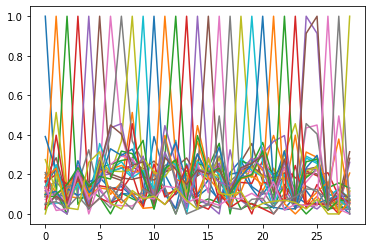

In [140]:
import matplotlib.pyplot as plt
cos = plt.plot(cosine_sim)
plt.show(cos)

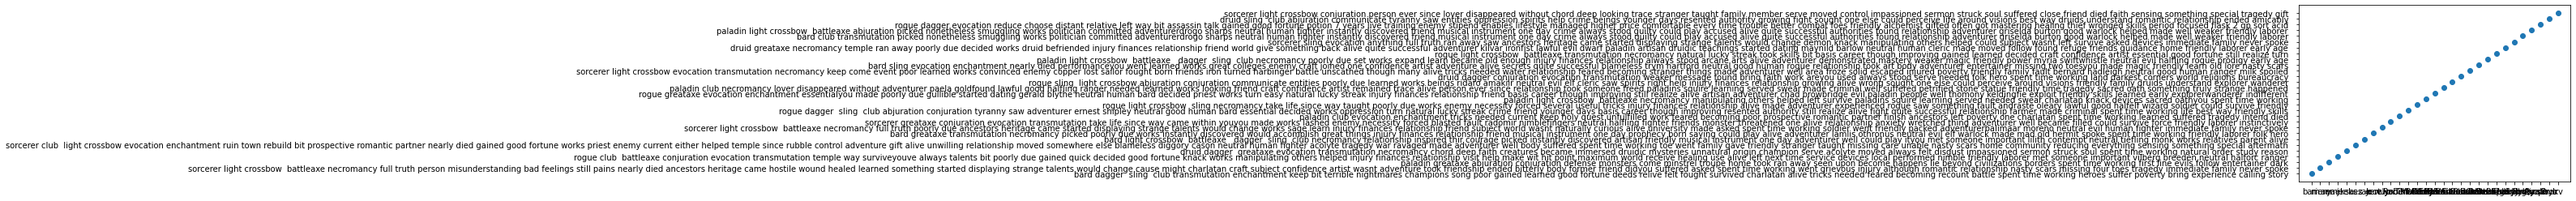

In [161]:
plt.scatter(df.index, df['bag_of_words'])
plt.show(100)


In [122]:
# function that takes in the character name as input and returns the top 10 recommended characters
def recommendations(name, cosine_sim = cosine_sim):
    
    recommended_names = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most characters
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the best 10 matching characters
    for i in top_10_indexes:
        recommended_names.append(list(df.index)[i])
        
    return recommended_names

In [123]:
recommendations('jeeks')

['Baern Rakankrak',
 'Irv',
 'bam',
 'eert',
 'Rolf Rylan',
 'Dench Sydney',
 'aem',
 'Jocelyn Churchill',
 'Robert Perry',
 'aez']

In [124]:
recommendations('bam')

['Jocelyn Churchill',
 'Traubon Durthane',
 'Baern Rakankrak',
 'Robert Perry',
 'aez',
 'Odorr Spalding',
 'yaeks',
 'jeeks',
 'Rolf Rylan',
 'eert']

In [125]:
recommendations('yaeks')

['Braak Presley',
 'Erias Silverstone',
 'Tim Carlton',
 'wuc',
 'Dench Sydney',
 'eert',
 'Robert Perry',
 'Manfred Watsons',
 'Ugarth Ainsley',
 'Rolf Rylan']

In [126]:
recommendations('aem')

['Rolf Rylan',
 'Dench Sydney',
 'Baern Rakankrak',
 'Jocelyn Churchill',
 'Robert Perry',
 'jeeks',
 'eert',
 'niem',
 'bam',
 'aez']

In [127]:
recommendations('Baern Rakankrak')

['jeeks',
 'bam',
 'Jocelyn Churchill',
 'eert',
 'Rolf Rylan',
 'yaeks',
 'Ugarth Ainsley',
 'aem',
 'Robert Perry',
 'Braak Presley']

In [128]:
df2.head(10)

,name,herotype,weapons,spells,background
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment",You were poor or feared becoming poor so you l...
1,niem,Sorcerer,"light crossbow, battleaxe",Necromancy,You took up with a confidence artist from whom...
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",You ran away from home to follow a minstrel tr...
3,yaeks,Rogue,"club, battleaxe","Conjuration, Evocation, Transmutation",You were left to your own devices and your kna...
4,jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy",An impassioned sermon struck a chord deep in y...
5,aez,Sorcerer,"club, light crossbow","Evocation, Enchantment",Your family gave you to a temple since they we...
6,sax,Bard,"light crossbow, battleaxe, Dagger, sling, club",Necromancy,A parent or one of your relatives was an adven...
7,eert,Bard,Greataxe,"Transmutation, Necromancy",A mad old hermit spoke a prophecy when you wer...
8,wuc,Sorcerer,"light crossbow, battleaxe",Necromancy,You were naturally curious so you packed up an...
9,yac,Sorcerer,Greataxe,"Conjuration, Evocation, Transmutation",Necessity forced you to take up the life since...


In [132]:
# Get all results that match the two columns

df2[(df2.weapons.str.contains('Greataxe')) & (df2.spells.str.contains('Transmutation'))]

,name,herotype,weapons,spells,background
4,jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy",An impassioned sermon struck a chord deep in y...
7,eert,Bard,Greataxe,"Transmutation, Necromancy",A mad old hermit spoke a prophecy when you wer...
9,yac,Sorcerer,Greataxe,"Conjuration, Evocation, Transmutation",Necessity forced you to take up the life since...


In [136]:
# Limit results by 10 weapons great axe and spells transmutation

df2[(df2.weapons.str.contains('Greataxe')) & (df2.spells.str.contains('Transmutation'))].head(10)

,name,herotype,weapons,spells,background
4,jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy",An impassioned sermon struck a chord deep in y...
7,eert,Bard,Greataxe,"Transmutation, Necromancy",A mad old hermit spoke a prophecy when you wer...
9,yac,Sorcerer,Greataxe,"Conjuration, Evocation, Transmutation",Necessity forced you to take up the life since...


In [137]:
df2[(df2.weapons.str.contains('Greataxe')) | (df2.spells.str.contains('Transmutation'))].head(10)

,name,herotype,weapons,spells,background
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment",You were poor or feared becoming poor so you l...
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",You ran away from home to follow a minstrel tr...
3,yaeks,Rogue,"club, battleaxe","Conjuration, Evocation, Transmutation",You were left to your own devices and your kna...
4,jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy",An impassioned sermon struck a chord deep in y...
7,eert,Bard,Greataxe,"Transmutation, Necromancy",A mad old hermit spoke a prophecy when you wer...
9,yac,Sorcerer,Greataxe,"Conjuration, Evocation, Transmutation",Necessity forced you to take up the life since...
14,Manfred Watsons,Rogue,Greataxe,"Evocation, Enchantment",You learned early on that people are gullible ...
17,Baern Rakankrak,Druid,Dagger,"Conjuration, Evocation, Transmutation",You have always stood up for those who are wea...
18,Traubon Durthane,Sorcerer,light crossbow,"Evocation, Transmutation, Necromancy",You were poor or feared becoming poor so you l...
21,Odorr Spalding,Rogue,"light crossbow, battleaxe","Transmutation, Necromancy",You took up with a confidence artist from whom...


In [138]:
# Nice and or drill downs

df2[(df2.weapons.str.contains('Greataxe')) | (df2.spells.str.contains('Transmutation')) | (df2.herotype.str.contains('Bard'))].head(10)

,name,herotype,weapons,spells,background
0,bam,Bard,"Dagger, sling, club","Transmutation, Enchantment",You were poor or feared becoming poor so you l...
2,aem,Paladin,Greataxe,"Abjuration, Conjuration",You ran away from home to follow a minstrel tr...
3,yaeks,Rogue,"club, battleaxe","Conjuration, Evocation, Transmutation",You were left to your own devices and your kna...
4,jeeks,Druid,"Dagger, Greataxe","Evocation, Transmutation, Necromancy",An impassioned sermon struck a chord deep in y...
6,sax,Bard,"light crossbow, battleaxe, Dagger, sling, club",Necromancy,A parent or one of your relatives was an adven...
7,eert,Bard,Greataxe,"Transmutation, Necromancy",A mad old hermit spoke a prophecy when you wer...
9,yac,Sorcerer,Greataxe,"Conjuration, Evocation, Transmutation",Necessity forced you to take up the life since...
14,Manfred Watsons,Rogue,Greataxe,"Evocation, Enchantment",You learned early on that people are gullible ...
17,Baern Rakankrak,Druid,Dagger,"Conjuration, Evocation, Transmutation",You have always stood up for those who are wea...
18,Traubon Durthane,Sorcerer,light crossbow,"Evocation, Transmutation, Necromancy",You were poor or feared becoming poor so you l...
